# Setup

set working directory to guitarist-net and add to path

In [1]:
%cd /content/drive/Othercomputers/My MacBook Pro/guitarist-net

/content/drive/Othercomputers/My MacBook Pro/guitarist-net


install requirements

In [2]:
!pip install -r requirements.txt &> /dev/null

imports

In [3]:
from data.single_string_dataset import SingleStringDataset
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
from plot_listen.listen import play
from plot_listen.plot import plot
from plot_listen.plot import plot_single_string_item
import librosa
from globals import *

# Load my train dataset

In [4]:
train_data = SingleStringDataset()

Type a number to select an option:
	0)	test_player-00_e-string.npz
	1)	train_player-not00_e-string.npz
	2)	test_player-00_E-string.npz
	3)	train_player-not00_E-string.npz
	4)	test_player-00_solo_E-string.npz
	5)	train_player-not00_solo_E-string.npz
	6)	test_player-00_solo_e-string.npz
	7)	train_player-not00_solo_e-string.npz
	8)	test_player-00_solo_e-string_1.0s_crepe.npz
	9)	train_player-not00_solo_e-string_1.0s_crepe.npz
	10)	test_player-00_solo_B-string_1.0s_crepe.npz
	11)	train_player-not00_solo_B-string_1.0s_crepe.npz
	12)	test_player-00_solo_G-string_1.0s_crepe.npz
	13)	train_player-not00_solo_G-string_1.0s_crepe.npz
	14)	test_player-00_solo_D-string_1.0s_crepe.npz
	15)	train_player-not00_solo_D-string_1.0s_crepe.npz
	16)	test_player-00_solo_A-string_1.0s_crepe.npz
	17)	train_player-not00_solo_A-string_1.0s_crepe.npz
	18)	test_player-00_solo_E-string_1.0s_crepe.npz
	19)	train_player-not00_solo_E-string_1.0s_crepe.npz
Selection: 7
train_player-not00_solo_e-string.npz


# Establish CREPE label path

In [5]:
path_to_crepe_audio = "/content/drive/MyDrive/Research/guitarist-net-storage/off-the-shelf/train_player-not00_solo_e-string/"

In [6]:
path_to_crepe_labels = os.path.join(path_to_crepe_audio, "f0_0.004/")

# Load labels for a given index

In [16]:
idx = 26

In [17]:
f0_thresh = 0.50 # confidence below this sets the freq to 0

In [18]:
my_f0_label = train_data[idx]["f0"]

crepe_label_filepath = os.path.join(path_to_crepe_labels, f"{idx}.f0.csv")
with open(crepe_label_filepath, 'r') as read_obj:
    csv_reader = csv.reader(read_obj)
    # convert string to list
    crepe_label = list(csv_reader)

# use [1:] to crop off column header at the start
crepe_times_label = [np.float32(elem[0]) for elem in crepe_label[1:]]
crepe_f0_label = [np.float32(elem[1]) for elem in crepe_label[1:]]
crepe_conf_label = [np.float32(elem[2]) for elem in crepe_label[1:]]

# replace f0 entries with confidence below thresh with 0
for i in range(len(crepe_f0_label)):
    if crepe_conf_label[i] < f0_thresh:
        crepe_f0_label[i] = np.float32(0.0)

crepe_f0_label = np.array(crepe_f0_label)[:-1]

# Compare Labels

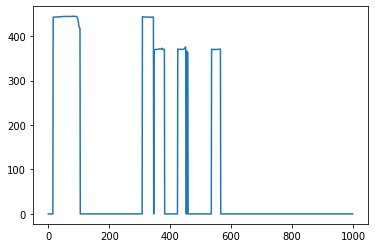

In [19]:
plot(my_f0_label)

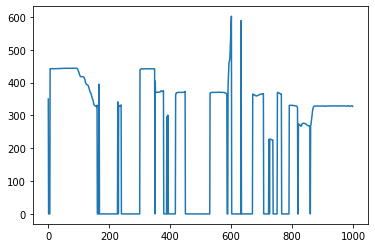

In [20]:
plot(crepe_f0_label)

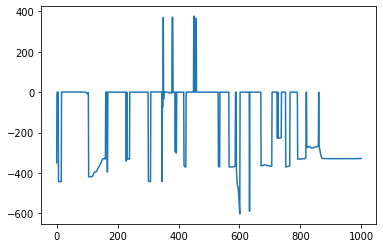

In [21]:
plot(my_f0_label - crepe_f0_label)

# Compare Audio

load my audio

In [13]:
my_audio = train_data[idx]["audio"]
play(my_audio)

load audio used by crepe

In [14]:
crepe_audio, crepe_audio_sr = librosa.load(os.path.join(path_to_crepe_audio, f"{idx}.wav"), sr=SR)

In [15]:
play(crepe_audio)